# 🧪 Exploratory Data Analysis (EDA)

This notebook explores the `xente_transactions.csv` dataset for the credit risk modeling project.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline


In [2]:
# Load dataset
df = pd.read_csv("../data/raw/xente_transactions.csv")

# Show first few rows
df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256.0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2018-11-15 02:18:49+00:00,2.0,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_2,3679.0,20.0,2018-11-15 02:19:08+00:00,2.0,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256.0,NaN,ProductId_1,airtime,ChannelId_3,500.0,500.0,2018-11-15 02:44:21+00:00,2.0,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256.0,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,NaN,2018-11-15 03:32:55+00:00,2.0,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2018-11-15 03:34:21+00:00,2.0,0


In [3]:
# Shape and data types
print("Dataset shape:", df.shape)
df.info()


Dataset shape: (95661, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95661 entries, 0 to 95660
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95661 non-null  object 
 1   BatchId               95661 non-null  object 
 2   AccountId             95659 non-null  object 
 3   SubscriptionId        95661 non-null  object 
 4   CustomerId            95661 non-null  object 
 5   CurrencyCode          95661 non-null  object 
 6   CountryCode           95659 non-null  float64
 7   ProviderId            95659 non-null  object 
 8   ProductId             95661 non-null  object 
 9   ProductCategory       95661 non-null  object 
 10  ChannelId             95661 non-null  object 
 11  Amount                95661 non-null  float64
 12  Value                 95658 non-null  float64
 13  TransactionStartTime  95661 non-null  object 
 14  PricingStrategy       95659 non-null  float

In [4]:
# Summary statistics for all columns
df.describe(include='all')


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
count,95661,95661,95659,95661,95661,95661,95659.0,95659,95661,95661,95661,9.566100e+04,9.565800e+04,95661,95659.000000,95661.000000
unique,95661,94808,3633,3627,3742,1,NaN,6,23,9,4,NaN,NaN,94555,NaN,NaN
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_3,NaN,NaN,2018-12-24 16:30:13+00:00,NaN,NaN
freq,1,28,30892,32629,4091,95661,NaN,38188,32634,45404,56935,NaN,NaN,17,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,6.718194e+03,9.900692e+03,NaN,2.255899,0.002018
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.233074e+05,1.231246e+05,NaN,0.732849,0.044872
min,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-1.000000e+06,2.000000e+00,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-5.000000e+01,2.750000e+02,NaN,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,1.000000e+03,1.000000e+03,NaN,2.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,2.800000e+03,5.000000e+03,NaN,2.000000,0.000000


In [5]:
# Check missing values
df.isnull().sum().sort_values(ascending=False)


Value                   3
AccountId               2
CountryCode             2
ProviderId              2
PricingStrategy         2
BatchId                 0
SubscriptionId          0
TransactionId           0
CustomerId              0
CurrencyCode            0
ProductId               0
ProductCategory         0
Amount                  0
ChannelId               0
TransactionStartTime    0
FraudResult             0
dtype: int64

In [6]:
# Convert TransactionStartTime to datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'], errors='coerce')


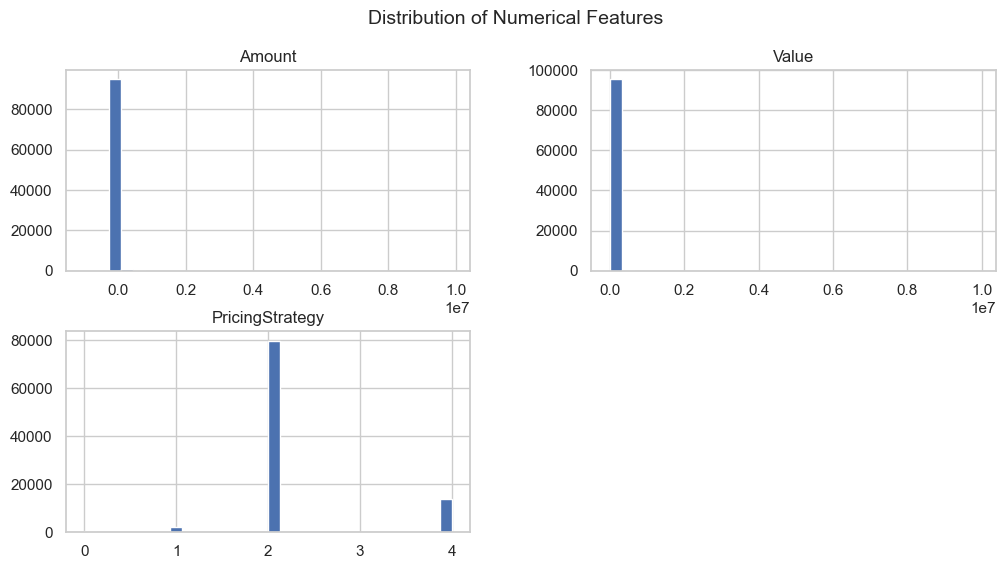

In [7]:
# Plot histograms of key numerical columns
num_cols = ['Amount', 'Value', 'PricingStrategy']

df[num_cols].hist(figsize=(12, 6), bins=30)
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()


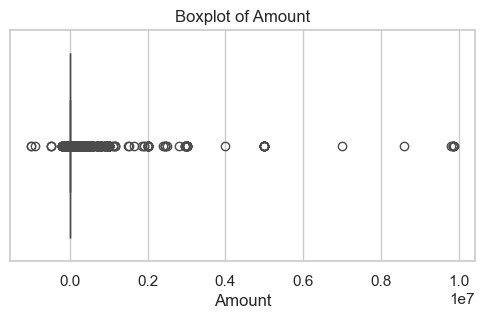

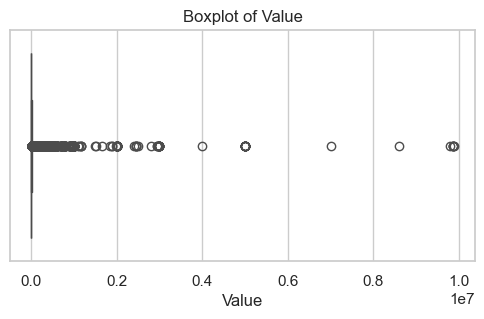

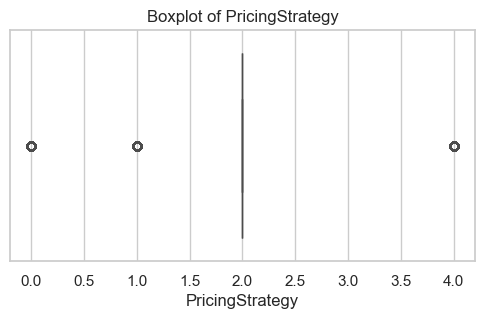

In [8]:
# Boxplots to detect outliers
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


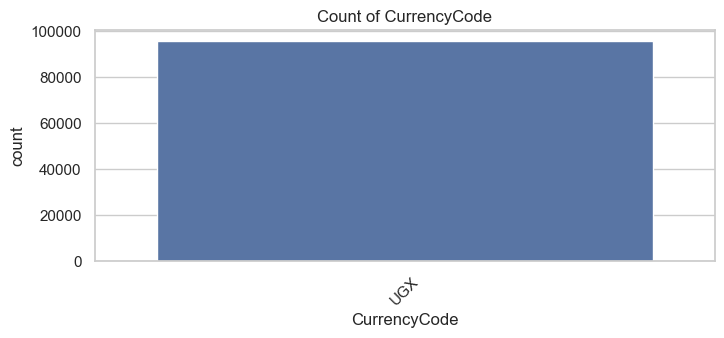

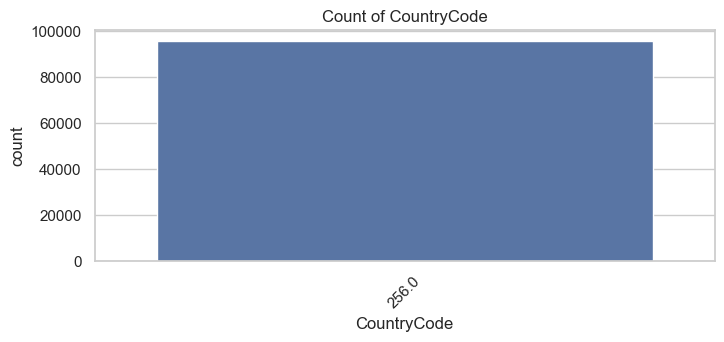

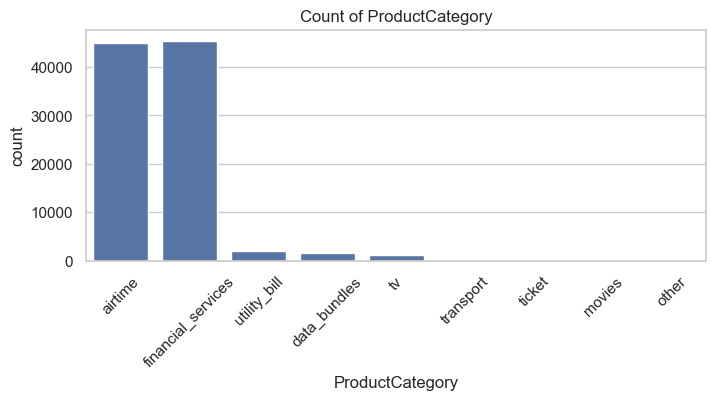

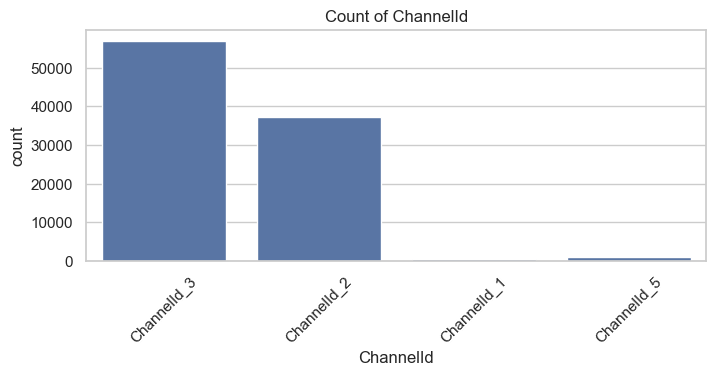

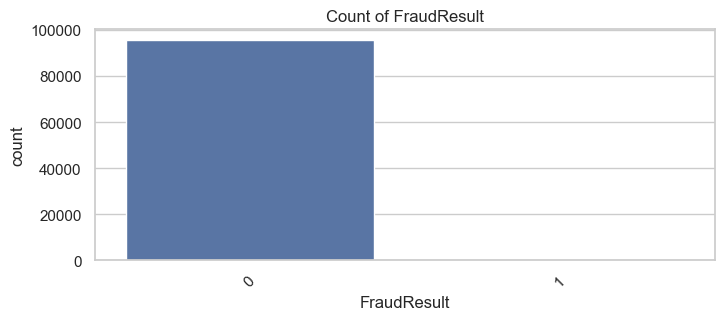

In [9]:
# Count plots for categorical features
cat_cols = ['CurrencyCode', 'CountryCode', 'ProductCategory', 'ChannelId', 'FraudResult']

for col in cat_cols:
    plt.figure(figsize=(8, 3))
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()


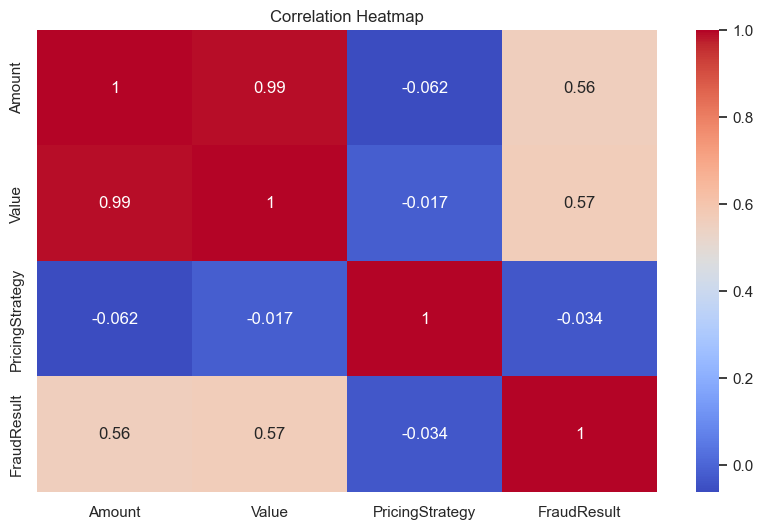

In [10]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols + ['FraudResult']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## 🔍 Key Insights from EDA

1. **Transaction Amounts** vary significantly and contain some outliers.
2. **Value and Amount** are strongly correlated, as expected.
3. There are **missing values** in fields like `Value` and `PricingStrategy`, which need to be handled.
4. Most transactions use the **UGX** currency and are from country code **256 (likely Uganda)**.
5. **FraudResult = 1** (fraud) cases are rare, indicating class imbalance that must be considered in modeling.
